In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("diminos_data.csv")

In [4]:
df.head()

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056


In [6]:
df.columns

Index(['order_id', 'order_placed_at', 'order_delivered_at'], dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            15000 non-null  int64         
 1   order_placed_at     15000 non-null  datetime64[ns]
 2   order_delivered_at  15000 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 351.7 KB


In [9]:
df["order_placed_at"]=pd.to_datetime(df["order_placed_at"])
df["order_delivered_at"]=pd.to_datetime(df["order_delivered_at"])

In [12]:
df["delivery_time"]=(df["order_delivered_at"]-df["order_placed_at"]).dt.total_seconds()/60

In [13]:
df.head()

,order_id,order_placed_at,order_delivered_at,delivery_time
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,17.140719
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,15.598754
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,15.104856
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,38.533657
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,16.176984


In [14]:
df["delivery_time"].describe()

count    15000.000000
mean        20.499389
std         96.160362
min         15.000010
25%         15.274826
50%         15.797986
75%         17.279661
max       7299.831375
Name: delivery_time, dtype: float64

In [15]:
df[df["delivery_time"]==max(df["delivery_time"])]

,order_id,order_placed_at,order_delivered_at,delivery_time
5499,1528610,2023-03-10 17:06:22,2023-03-15 18:46:11.882496,7299.831375


In [16]:
df["delivery_time"].quantile(0.95)

np.float64(27.261043996666658)

In [28]:
print("% of free pizzas :",(df["delivery_time"]>31).sum()/len(df) *100,"%")

% of free pizzas : 3.713333333333333 %


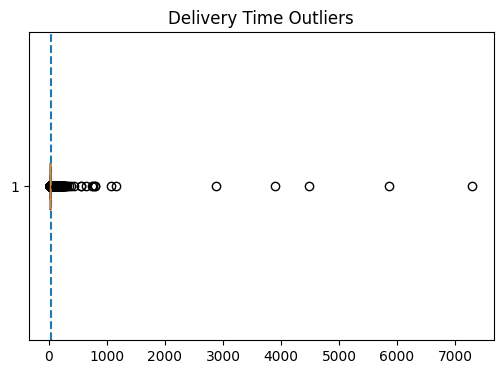

In [31]:
plt.figure(figsize=(6,4))
plt.boxplot(df["delivery_time"], vert=False)
plt.axvline(31, linestyle="--")
plt.title("Delivery Time Outliers")
plt.show()


In [36]:
df=df[df["delivery_time"]<1000]

In [37]:
df["delivery_time"].max()

np.float64(788.65302215)

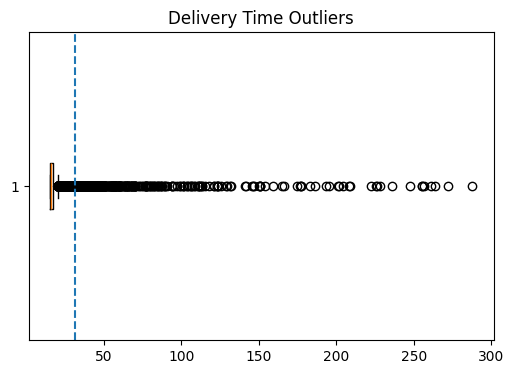

In [41]:
plt.figure(figsize=(6,4))
plt.boxplot(df["delivery_time"], vert=False)
plt.axvline(31, linestyle="--")
plt.title("Delivery Time Outliers")
plt.show()


In [40]:
df=df[df["delivery_time"]<300]

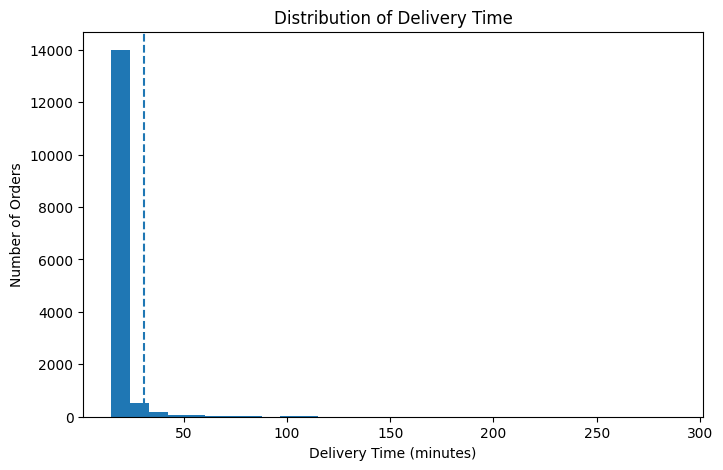

In [42]:
plt.figure(figsize=(8,5))
plt.hist(df["delivery_time"], bins=30)
plt.axvline(31, linestyle="--")
plt.xlabel("Delivery Time (min)")
plt.ylabel("Number of Orders")
plt.title("Distribution of Delivery Time")
plt.show()


In [44]:
df["order_hour"] = df["order_placed_at"].dt.hour


In [45]:
hourly_p95 = df.groupby("order_hour")["delivery_time"].quantile(0.95)


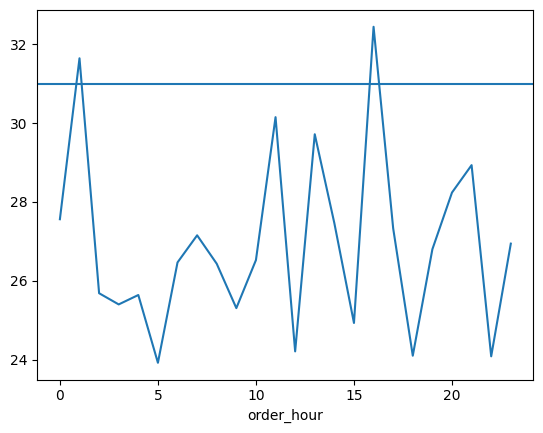

In [46]:
hourly_p95.plot()
plt.axhline(31)
plt.show()